**Finding Best possible warehouse locations based on store locations**


In [104]:
!apt install proj-bin libproj-dev libgeos-dev
#!apt install proj-bin libproj-dev reverse_geocoder
#!apt install proj-bin libproj-dev pprint


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [105]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     |████████████████████████████████| 132.4MB 107kB/s 
  Created wheel for basemap: filename=basemap-1.1.0-cp36-cp36m-linux_x86_64.whl size=121632057 sha256=beaf03855d3b65137419071d402177ecb9f3b299a88d4be45a160b331a8d5279
  Stored in directory: /tmp/pip-ephem-wheel-cache-garg2h2m/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap
  Found existing installation: basemap 1.2.1
    Uninstalling basemap-1.2.1:
      Successfully uninstalled basemap-1.2.1


In [1]:
!pip install -U git+https://github.com/matplotlib/basemap.git
#import reverse_geocoder as rg 
#import pprint 


  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-0_upyhm9
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-0_upyhm9
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756034 sha256=aae02b833e2cae86adfb29acc5d6fea2eae2f4ad1372ec5118ec76df1a2897f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-_6al_3rp/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
Successfully built basemap
  Found existing installation: basemap 1.1.0
    Uninstalling basemap-1.1.0:
      Successfully uninstalled basemap-1.1.0


In [0]:
from mpl_toolkits.basemap import Basemap  # Referenced from "https://rabernat.github.io/research_computing/intro-to-basemap.html"
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

In [0]:
from sklearn.cluster import DBSCAN  # Referenced from "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html"
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd 
from google.colab import files
uploaded = files.upload()


Saving q3dbscan.csv to q3dbscan (1).csv


In [6]:
import io
import numpy as np
df= pd.read_csv(io.BytesIO(uploaded['q3dbscan.csv']))
print(df.shape)

(2232, 8)


In [0]:
df.dropna(subset=['Lat','Long'],inplace=True)

In [8]:
df

,Store ID,ADDRESS,ADDRESS 2,CITY,WAREHOUSEID,STATE and PIN,Lat,Long
0,140024830,NaN,10400 ROSECRANS,BELLFLOWER,4614 BUENA PARK WAREHOUSE CA DU,CA,35.636876,120.654502
1,140045667,NaN,2121 SPG ST,PASO ROBLES,4614 BUENA PARK WAREHOUSE CA DU,CA,35.448802,93.460406
2,140025497,NaN,100 WATER ST BERTH 184,WILMINGTON,4639 ONTARIO CA DU,CA,36.808677,76.310990
3,140017593,NaN,110-8200 BLDG 21,RIDGECREST,4639 ONTARIO CA DU,CA,33.785795,118.264357
4,140034771,NaN,1168 W BR ST,ARROYO GRANDE,4639 ONTARIO CA DU,CA,35.622456,117.670897
...,...,...,...,...,...,...,...,...
2227,140005513,NaN,170 EL CAMINO REAL,SOUTH SAN FRANCISCO,4651 MILPITAS CA DU,CA,45.733174,121.498167
2228,200065629,NaN,725 B ST,EUREKA,4635 PORTLAND OR DU,CA,46.400999,122.959307
2229,140012326,NaN,150 B AVE,CORONADO,4639 ONTARIO CA DU,CA,46.880487,102.775283
2230,140002568,NaN,720 3RD AVE,CHULA VISTA,4639 ONTARIO CA DU,CA,47.604099,122.332249


In [9]:
print("Lat max",df['Lat'].max())
print("Lat min",df['Lat'].min())
print("Long max",df['Long'].max())
print("Long min",df['Long'].min())

Lat max 57.79
Lat min 1.3591
Long max 152.40722209999998
Long min 3.9451120000000004


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


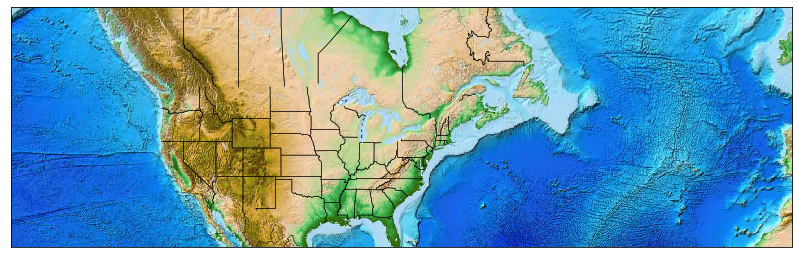

In [10]:
my_map = Basemap(projection='merc',resolution='l',area_thresh=1000,llcrnrlat=25.753,llcrnrlon=-152,urcrnrlat=57.79,urcrnrlon=-7.539) # Referenced from "https://rabernat.github.io/research_computing/intro-to-basemap.html"
my_map.drawstates() 
my_map.drawlsmask(land_color='orange',ocean_color='skyblue')
my_map.bluemarble()
my_map.etopo()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0 -1 -1 ... -1 -1 -1]


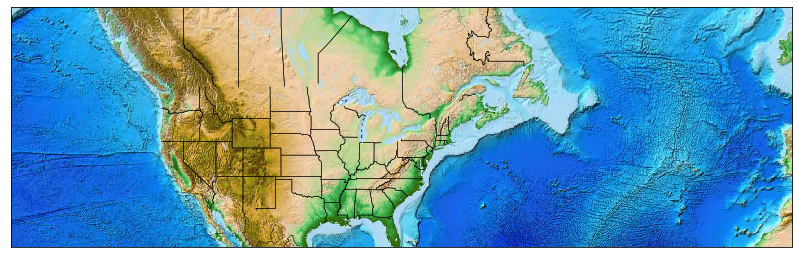

In [11]:
my_map.drawstates()
my_map.drawlsmask(land_color='orange',ocean_color='skyblue')
my_map.bluemarble()
my_map.etopo()

xs,ys=my_map(np.asarray(df.Long),np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

df_cluster=df[["Long","Lat"]]
df_cluster=StandardScaler().fit_transform(df_cluster)   
x = np.array(df_cluster)
cls=DBSCAN(eps=0.7,min_samples=30).fit(x)   # Referenced from "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html"
labels=cls.labels_
df["Clus_Db"]=labels

#realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
print(labels)
for index,row in df.iterrows():
   x,y = my_map(row.Long, row.Lat)
   my_map.plot(x, y,markerfacecolor ='red',markeredgecolor='black', marker='s', markersize= 0.01, alpha = 0.4)




        

In [12]:
labels # labels for each of the clusters

array([ 0, -1, -1, ..., -1, -1, -1])

In [0]:
import numpy

In [14]:
numpy.unique(labels) # unique labels for the clusters

array([-1,  0,  1])

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [17]:
k = 4
x_vals = np.random.randint(0, np.max(df['xm'])-10, size=k)
y_vals = np.random.randint(0, np.max(df['ym'])-10, size=k)
cities = np.array(list(zip(x_vals, y_vals)), dtype=np.float32)
print(cities)
values = []
x = np.asarray(df.Long)
y = np.asarray(df.Lat)
labels_array = np.asarray(labels)
x1 = []
x2 = []

y1 = []
y2 = []
for i in range(0,len(x)):
  if labels_array[i] == 1:
    x1.append(x[i])
    y1.append(y[i])
  elif labels_array[i] == 0:
    x2.append(x[i])
    y2.append(y[i])
     
print(x1)     
print(y1)
print(y2)
print(x2)

def convert_to_cartisan(cities):

    for coordinates in cities:
        latitude = float(coordinates[1])
        longitude = float(coordinates[2])
        radius_earth = 6731

        flat = radius_earth * math.cos(latitude) * math.cos(longitude) , radius_earth * math.cos(latitude) * math.sin(longitude) , radius_earth * math.sin(latitude)
    return flat

#convert_to_cartisan(cities)



[[ 1039511.  4179661.]
 [ 6241902.   923611.]
 [ 2735815.  3144232.]
 [14468143.  1035413.]]
[76.9969546, 77.0201124, 76.7946459, 77.0221944, 74.837616, 77.1527813, 77.1673087, 75.5634, 75.140689, 74.0554861, 75.3353875, 75.9764173, 80.6250065, 79.9340431, 80.220857, 73.9759092, 74.0111157, 74.00782120000001, 74.0008394, 73.99358559999999, 74.278246, 73.93325, 73.95873859999999, 74.003043, 73.4399225, 73.90026209999999, 73.81762370000001, 73.89791899999999, 73.7674821, 73.23138320000001, 72.85106329999999]
[38.882913099999996, 38.8970808, 38.9011245, 38.96145670000001, 38.969994, 39.0839994, 39.361879200000004, 39.743086, 39.96546, 40.1363358, 40.2972847, 40.3261531, 40.37063679999999, 40.48562570000001, 40.5582458, 40.6420814, 40.7088069, 40.713007899999994, 40.7201606, 40.728708700000006, 40.7431779, 40.76636, 40.7728547, 40.796348200000004, 40.8718412, 40.8854998, 40.9069489, 40.9369, 41.0546328, 41.296386, 41.438795]
[35.6368759, 33.7857948, 35.6224561, 35.1289875, 33.3683137, 32.5

In [20]:
def combine(x, y): 
    combined = [(x[i], y[i]) for i in range(0, len(x))] 
    return combined 
list1 = combine(x1,y1)
list2 = combine(x2,y2)

def centroid(lst):
   lat_coords = []
   long_coords = []
   for l in lst :
      lat_coords.append(l[0])
      long_coords.append(l[1])
      cent_x = sum(lat_coords)/len(lat_coords)
      cent_y = sum(long_coords)/len(long_coords)
   return (cent_x,cent_y)

print(centroid(list1))
print(centroid(list2))



(75.3197130451613, 40.2878640516129)
(118.05211866608549, 34.02773298386625)
